### **Importing Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### **Read Train Data**

In [2]:
df_train = pd.read_csv('./Data/train.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### **Base Stats for Dataset**

In [3]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### **Check representation for each class**

<AxesSubplot:xlabel='Activity', ylabel='Count'>

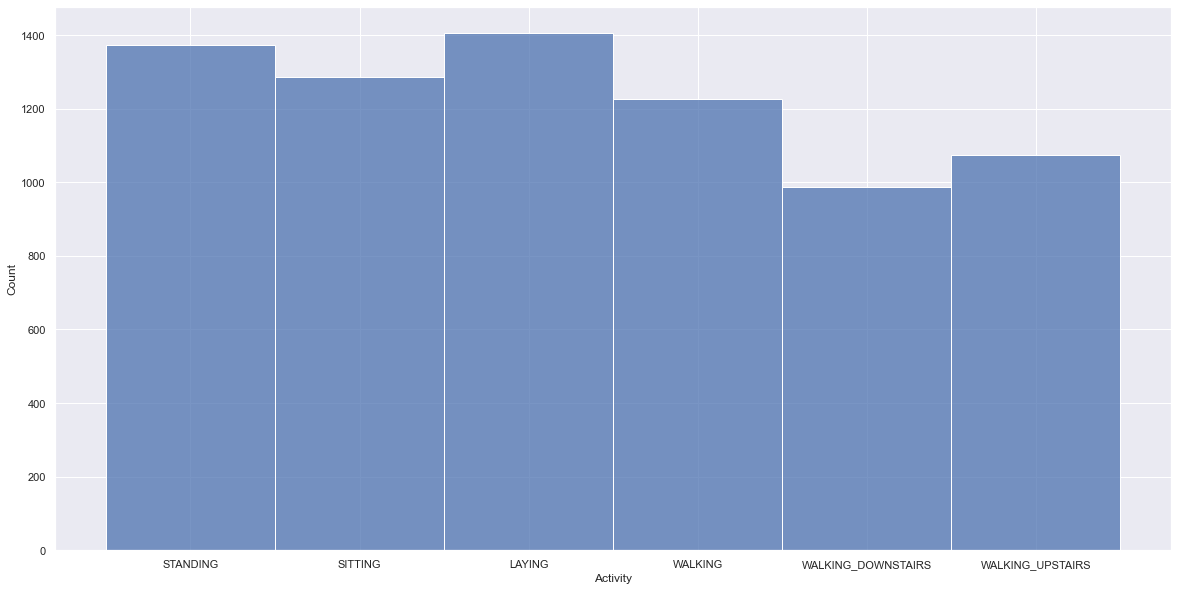

In [4]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(df_train, x="Activity")

### **Dropping OP before running PCA**

In [5]:
df_trim = df_train.drop(['subject', 'Activity'], axis = 1)

### **Check for Null and Duplicated Values**

In [6]:
print(f'Null Value Present: {df_trim.isna().values.all()}')
print(f'Duplicated Value Present: {df_trim.duplicated().values.all()}')

Null Value Present: False
Duplicated Value Present: False


### **Fitting PCA to train data**

#### Here the optimum number of Principle are determined from graph generated by PCA-Evaluation Notebook

In [7]:
pca = PCA(n_components = 9)
pca.fit(df_trim)
print(f'Explained Variance by 9 Principal Components: {np.cumsum(pca.explained_variance_ratio_ * 100)[-1]}')
reduced = pca.transform(df_trim)
df_pca_train = pd.DataFrame(reduced)
df_pca_train['activity'] = df_train['Activity']
df_pca_train.head()

Explained Variance by 9 Principal Components: 79.64585174244816


,0,1,2,3,4,5,6,7,8,activity
0,-5.520280,-0.290278,-1.529929,1.333245,1.425081,-0.194800,0.577488,0.691242,-1.222032,STANDING
1,-5.535350,-0.082530,-1.924804,0.671271,0.671259,0.735110,-0.616886,-0.771732,-0.615565,STANDING
2,-5.474988,0.287387,-2.144642,0.531805,0.207822,-0.037798,0.057652,0.093997,-0.063601,STANDING
3,-5.677232,0.897031,-2.018220,0.157124,0.759089,1.079580,-0.267832,-0.731353,0.281139,STANDING
4,-5.748749,1.162952,-2.139533,0.207824,0.473091,0.463049,-0.152267,-0.107473,0.289960,STANDING


### **Transforming test data to the fitted PCA**

In [8]:
df_test = pd.read_csv('./Data/test.csv')
reduced_test = pca.transform(df_test.iloc[:,:-2])
df_pca_test = pd.DataFrame(reduced_test)
df_pca_test['Activity'] = df_test['Activity']

### **Splitting X and Y components**

In [9]:
X_train = df_pca_train.iloc[:,:-1]
y_train = df_pca_train.iloc[:,-1]
X_test = df_pca_test.iloc[:,:-1]
y_test = df_pca_test.iloc[:,-1]

### **Hyperparameter tuning with 10-fold cross validation for Logistic Regression**

In [10]:
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
for k in solvers:
    model_lr = LogisticRegression(random_state = 42, multi_class = 'multinomial', penalty = 'none', solver = k)
    print(f"Accuracy[Logistic Regression] {k}: {cross_val_score(model_lr, X_train, y_train, cv = 10, scoring = 'accuracy').mean()}")

Accuracy[Logistic Regression] newton-cg: 0.8667027136941734
Accuracy[Logistic Regression] lbfgs: 0.8690150842945874
Accuracy[Logistic Regression] sag: 0.8691513235729074
Accuracy[Logistic Regression] saga: 0.869151138716356


### **Hyperparameter tuning with 10-fold cross validation for Support Vector Machine (SVM)**

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_values = [0.1, 1, 10]
for k in kernels:
    for c in c_values:
        model_svm = SVC(random_state=42, kernel = k, C = c)
        print(f"Accuracy[SVM] {k} {c}: {cross_val_score(model_svm, X_train, y_train, cv = 10, scoring = 'accuracy').mean()}")

Accuracy[SVM] linear 0.1: 0.8675188553682343
Accuracy[SVM] linear 1: 0.8692862688553683
Accuracy[SVM] linear 10: 0.8690139751552796
Accuracy[SVM] poly 0.1: 0.8510642191659272
Accuracy[SVM] poly 1: 0.8620800059154096
Accuracy[SVM] poly 10: 0.8669748225377107
Accuracy[SVM] rbf 0.1: 0.8660250295770483
Accuracy[SVM] rbf 1: 0.8665672138420586
Accuracy[SVM] rbf 10: 0.8679264640638864
Accuracy[SVM] sigmoid 0.1: 0.7656453342206448
Accuracy[SVM] sigmoid 1: 0.694921066252588
Accuracy[SVM] sigmoid 10: 0.6614598121857439


### **Hyperparameter tuning with 10-fold cross validation for Random Forest Classifier**

In [12]:
l = ['gini', 'entropy', 'log_loss']
m = ['sqrt', 'log2']
for i in l:  
    for j in m:  
        model_rf = RandomForestClassifier(random_state=42, n_estimators=50, max_features = j, criterion = i)
        print(f"Accuracy[Random Forest] {i} {j}: {cross_val_score(model_rf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()}")

Accuracy[Random Forest] gini sqrt: 0.8461673691215615
Accuracy[Random Forest] gini log2: 0.8461673691215615
Accuracy[Random Forest] entropy sqrt: 0.8494330449571134
Accuracy[Random Forest] entropy log2: 0.8494330449571134
Accuracy[Random Forest] log_loss sqrt: 0.8494330449571134
Accuracy[Random Forest] log_loss log2: 0.8494330449571134


### **Hyperparameter tuning with 10-fold cross validation for XGBoost Classifier**

In [13]:
model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0, n_estimators = 50)
print(f"Accuracy[XGB]: {cross_val_score(model_xgb, X_train, y_train, cv = 10, scoring = 'accuracy').mean()}")

Accuracy[XGB]: 0.8498389899438037


### **Logistic Regression Final Model**

In [14]:
#Logistic Regression
model_lr = LogisticRegression(random_state=42, multi_class='multinomial', penalty='none', solver='lbfgs')
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, preds_lr)
class_report_lr= metrics.classification_report(y_test, preds_lr)
print(class_report_lr)

                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.79      0.74      0.76       491
          STANDING       0.78      0.86      0.82       532
           WALKING       0.89      0.97      0.92       496
WALKING_DOWNSTAIRS       0.87      0.77      0.82       420
  WALKING_UPSTAIRS       0.86      0.88      0.87       471

          accuracy                           0.87      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.87      0.87      2947



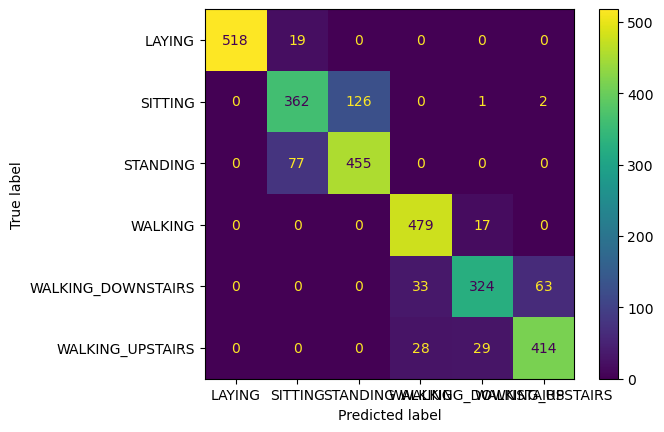

In [30]:
matplotlib.rc_file_defaults()
metrics.plot_confusion_matrix(model_lr, X_test, y_test)

### **SVM Final Model**

In [16]:
model_svm = SVC(random_state = 42, kernel = 'linear')
model_svm.fit(X_train, y_train)
preds_svm = model_svm.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, preds_svm)
class_report_svm= metrics.classification_report(y_test, preds_svm)
print(class_report_svm)
print(preds_svm)

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.79      0.74      0.77       491
          STANDING       0.78      0.85      0.82       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.88      0.79      0.83       420
  WALKING_UPSTAIRS       0.88      0.88      0.88       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

['SITTING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING']


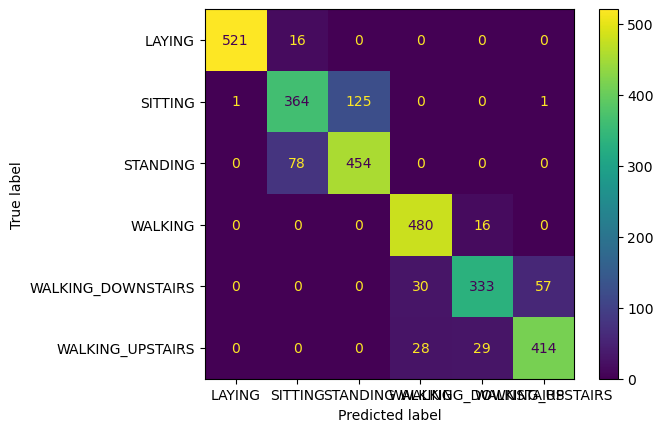

In [31]:
metrics.plot_confusion_matrix(model_svm, X_test, y_test)

### **Random Forest Classifier Final Model**

In [18]:
# Random Forest
model_clf = RandomForestClassifier(random_state=42, n_estimators=50, max_features = 'log2', criterion = 'entropy')
model_clf.fit(X_train,y_train)
preds_clf = model_clf.predict(X_test)
acc_clf = metrics.accuracy_score(y_test, preds_clf)
class_report_clf= metrics.classification_report(y_test, preds_clf)
print(class_report_clf)

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.78      0.70      0.74       491
          STANDING       0.76      0.85      0.80       532
           WALKING       0.83      0.96      0.89       496
WALKING_DOWNSTAIRS       0.84      0.75      0.79       420
  WALKING_UPSTAIRS       0.90      0.83      0.86       471

          accuracy                           0.85      2947
         macro avg       0.85      0.84      0.84      2947
      weighted avg       0.85      0.85      0.85      2947



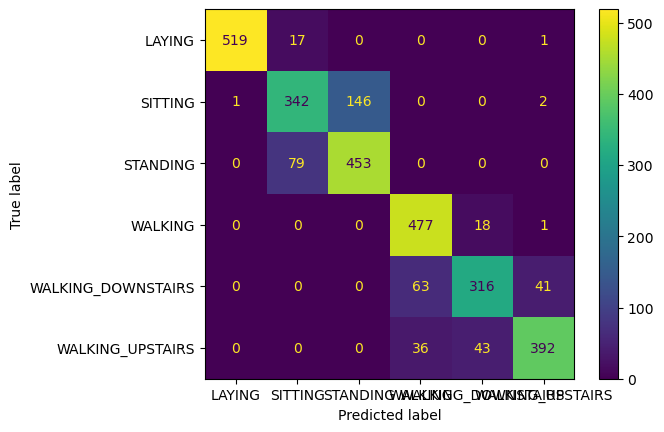

In [32]:
metrics.plot_confusion_matrix(model_clf, X_test, y_test)

### **XGBoost Classifier Final Model**

In [20]:
# XGBoost
model_xgb = xgb.XGBClassifier(n_estimators = 50)
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)
acc_xgb = metrics.accuracy_score(y_test, preds_xgb)
class_report_xgb= metrics.classification_report(y_test, preds_xgb)
print(class_report_xgb)

                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.98       537
           SITTING       0.78      0.70      0.74       491
          STANDING       0.76      0.87      0.81       532
           WALKING       0.84      0.97      0.90       496
WALKING_DOWNSTAIRS       0.87      0.75      0.81       420
  WALKING_UPSTAIRS       0.89      0.86      0.87       471

          accuracy                           0.85      2947
         macro avg       0.86      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947



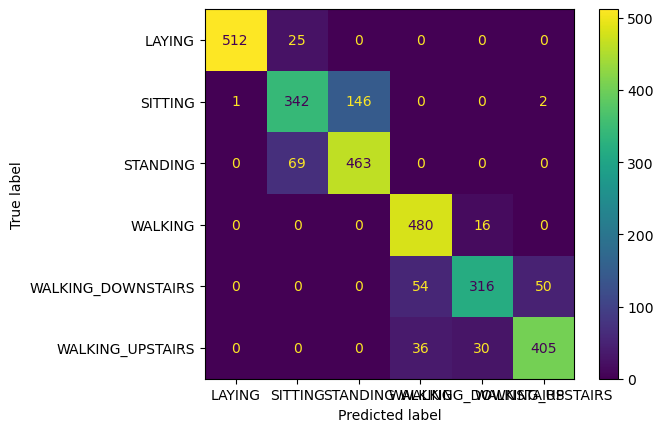

In [33]:
metrics.plot_confusion_matrix(model_xgb, X_test, y_test)

### **Plotting ROC Curve for Logistic Regression**

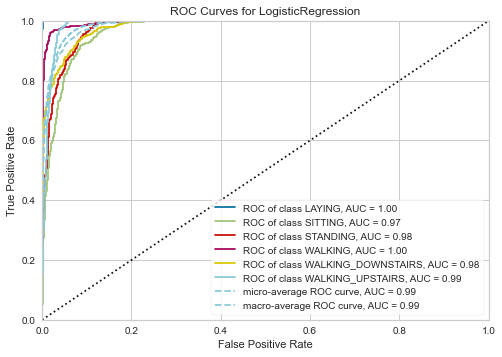

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model_lr, classes=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()